In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.utils as utils

In [3]:
import glob
import os

#data_files = glob.glob('data/pieman_data/*.nii')
data_files = glob.glob('/home/eli/Documents/new_pieman/word/*.nii')

def tasks(fs):
    for f in fs:
        fname = os.path.splitext(os.path.basename(f))[0].split('-')
        yield fname[len(fname) - 1]

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
dtfa = DTFA.DeepTFA(data_files, mask='/home/eli/Documents/new_pieman/word/wholebrain.nii.gz', num_factors=10, embedding_dim=2, tasks=list(tasks(data_files)))

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


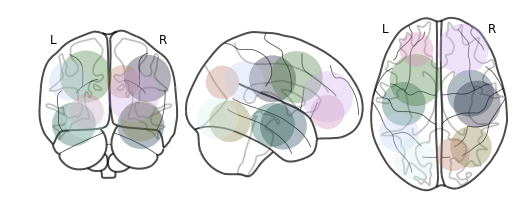

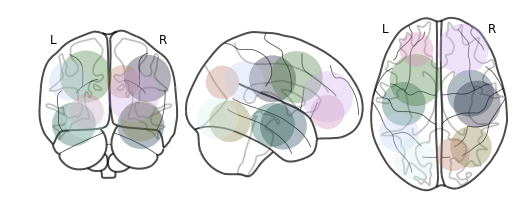

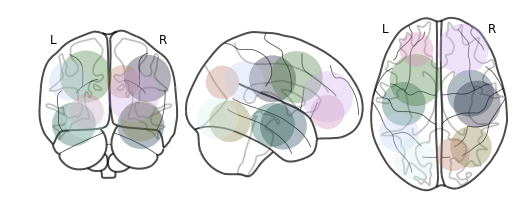

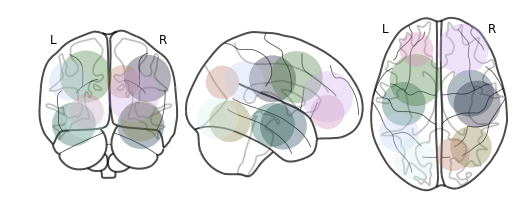

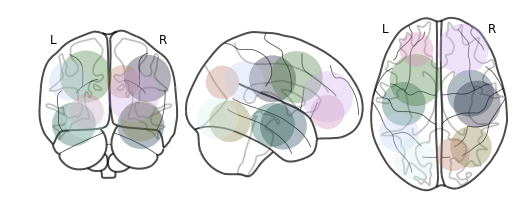

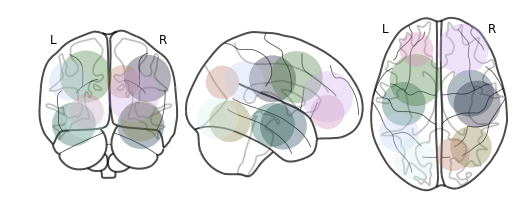

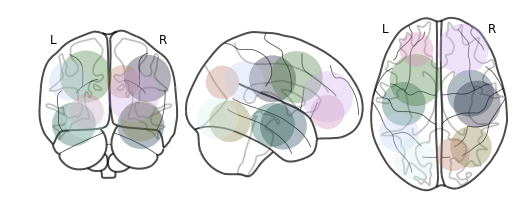

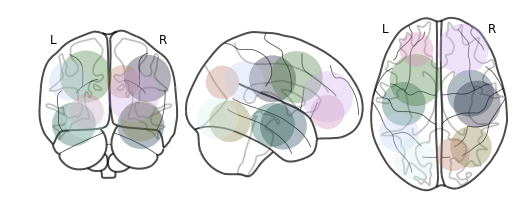

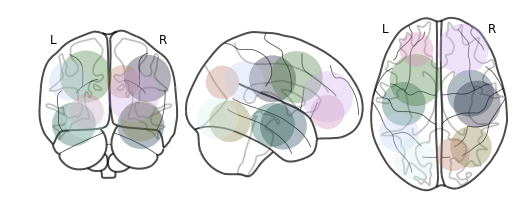

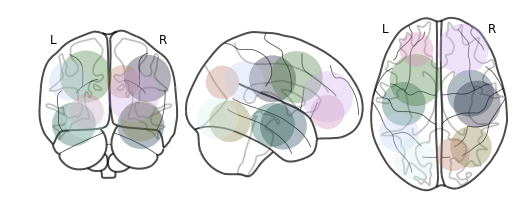

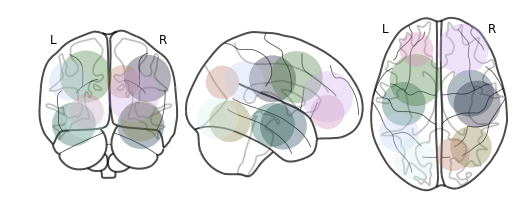

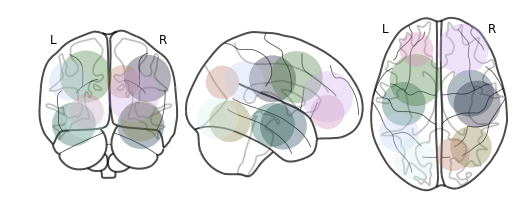

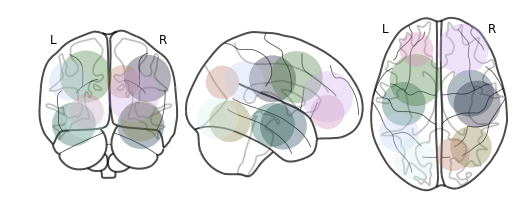

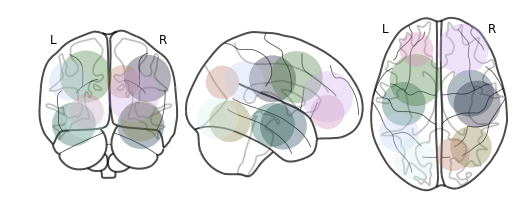

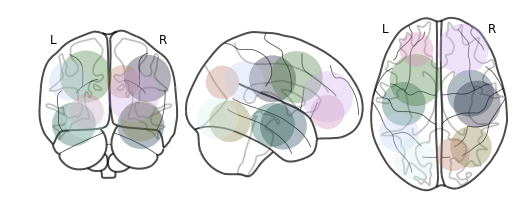

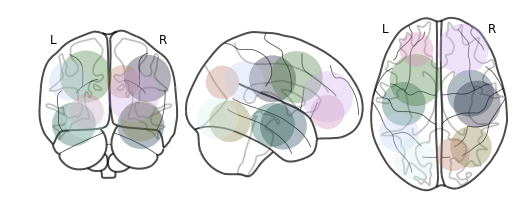

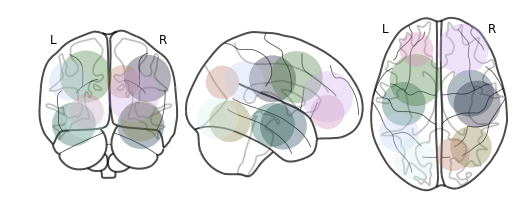

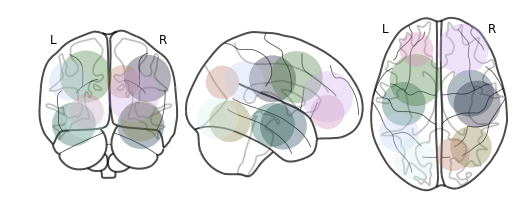

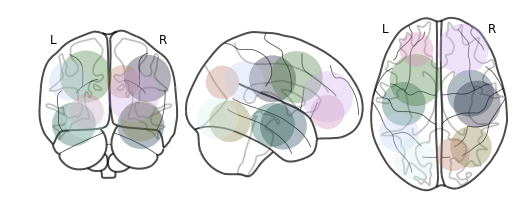

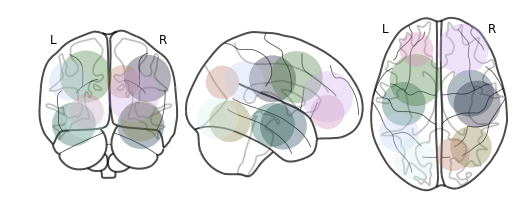

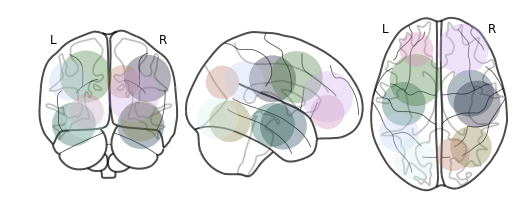

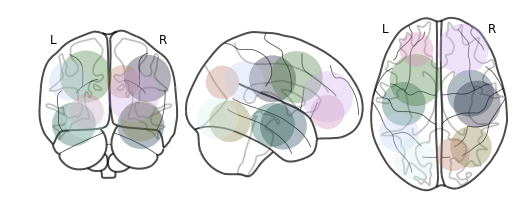

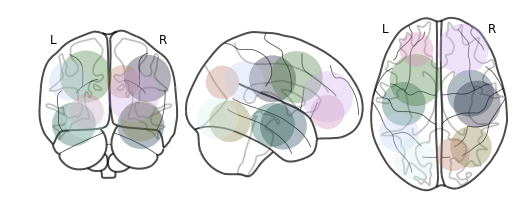

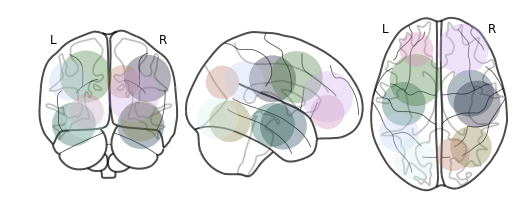

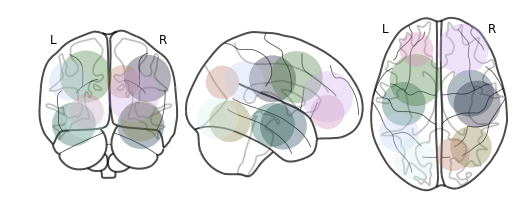

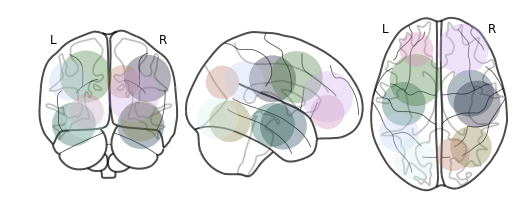

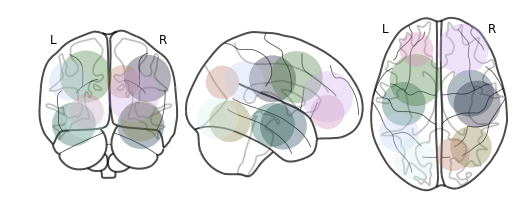

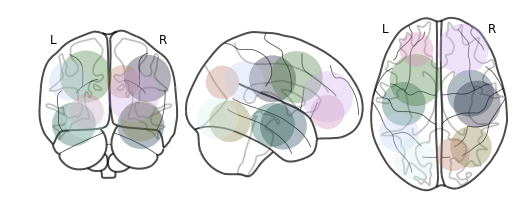

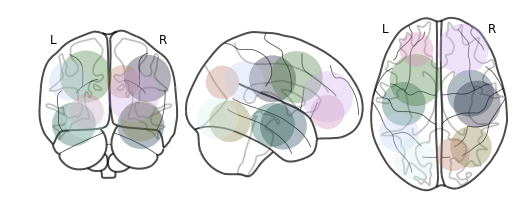

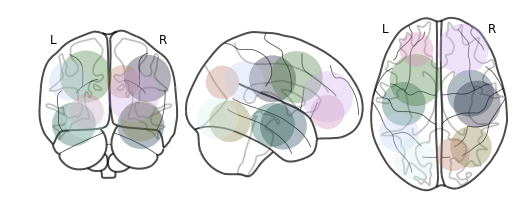

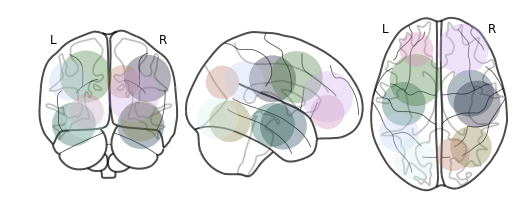

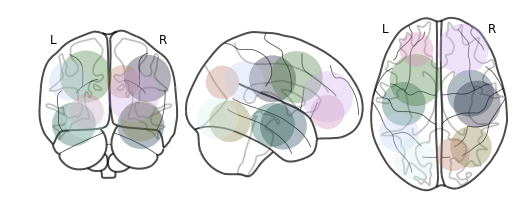

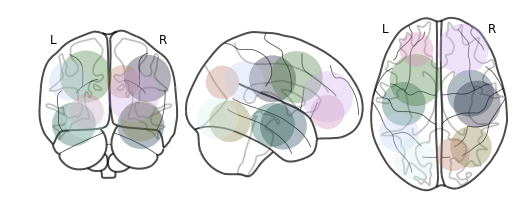

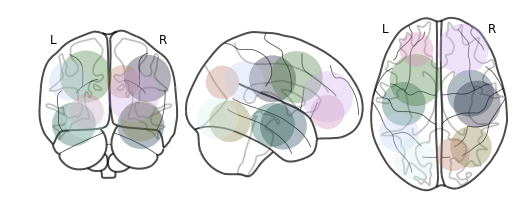

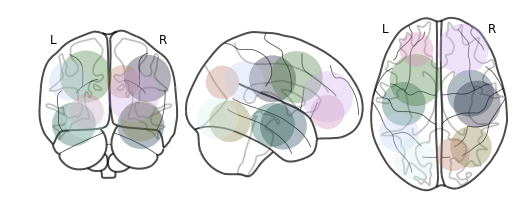

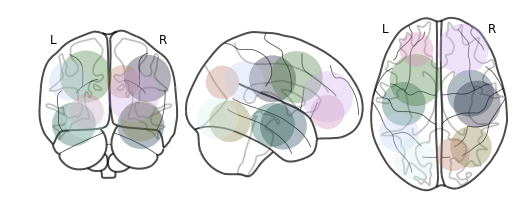

In [6]:
for s in range(dtfa.num_subjects):
    dtfa.plot_factor_centers(s)

In [7]:
losses = dtfa.train(num_steps=100, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True)

04/11/2018 15:53:27 [Epoch 1] (7596ms) Posterior free-energy 4.99519857e+10
04/11/2018 15:53:33 [Epoch 2] (5908ms) Posterior free-energy 4.02613576e+10
04/11/2018 15:53:39 [Epoch 3] (5955ms) Posterior free-energy 3.62144236e+10
04/11/2018 15:53:45 [Epoch 4] (6053ms) Posterior free-energy 3.62791649e+10
04/11/2018 15:53:51 [Epoch 5] (6037ms) Posterior free-energy 3.59144161e+10
04/11/2018 15:53:57 [Epoch 6] (5913ms) Posterior free-energy 3.55869286e+10
04/11/2018 15:54:03 [Epoch 7] (5985ms) Posterior free-energy 3.54653061e+10
04/11/2018 15:54:09 [Epoch 8] (5944ms) Posterior free-energy 3.54434785e+10
04/11/2018 15:54:15 [Epoch 9] (6371ms) Posterior free-energy 3.54347868e+10
04/11/2018 15:54:21 [Epoch 10] (6234ms) Posterior free-energy 3.54333983e+10
04/11/2018 15:54:27 [Epoch 11] (5953ms) Posterior free-energy 3.54275205e+10
04/11/2018 15:54:33 [Epoch 12] (5921ms) Posterior free-energy 3.54121564e+10
04/11/2018 15:54:39 [Epoch 13] (5977ms) Posterior free-energy 3.53951048e+10
04/11/20

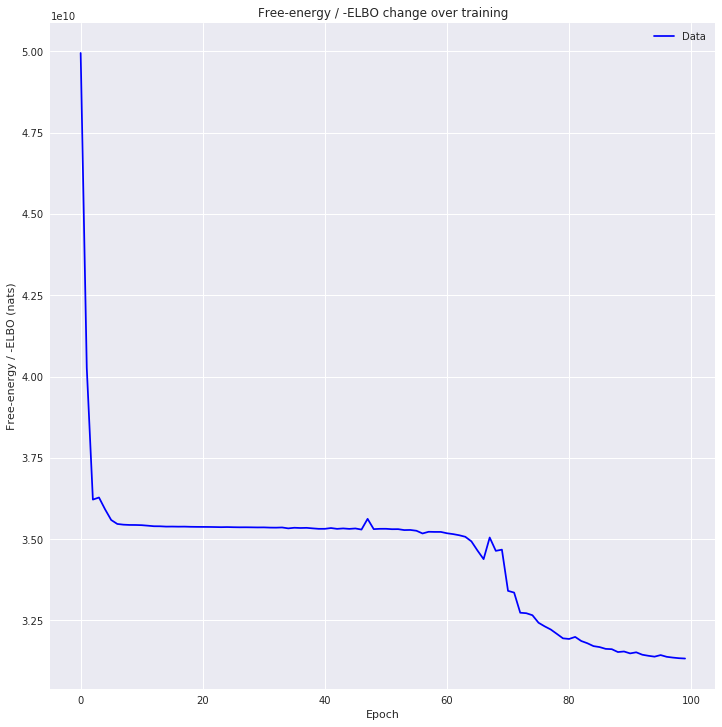

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


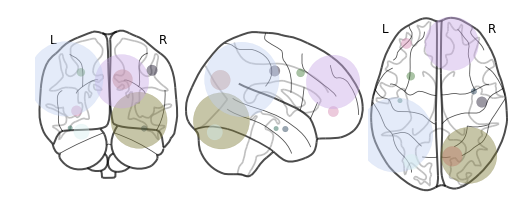

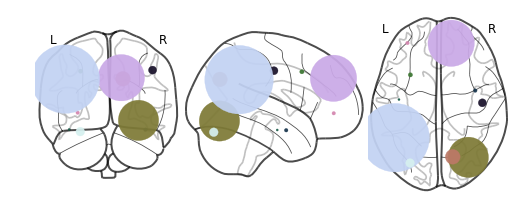

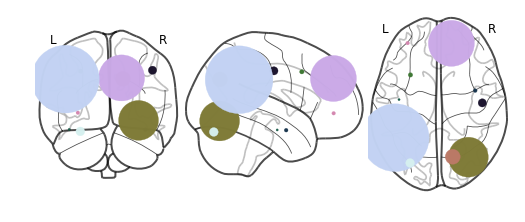

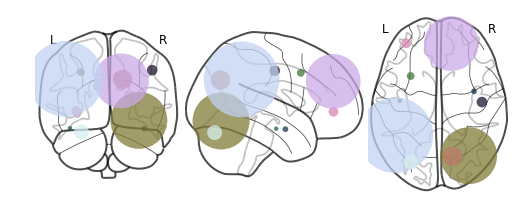

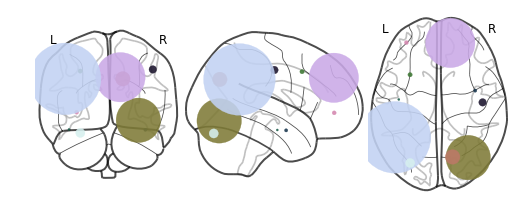

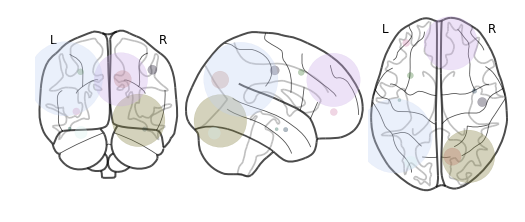

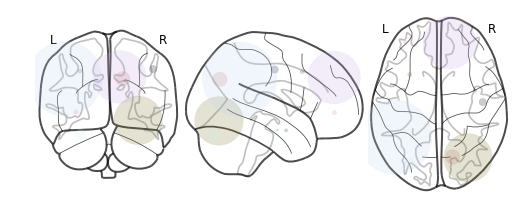

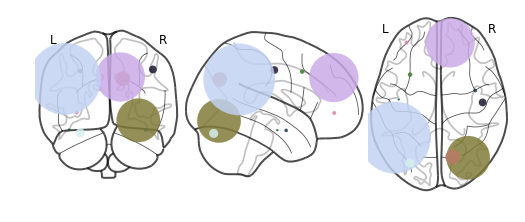

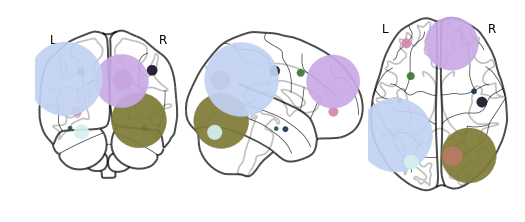

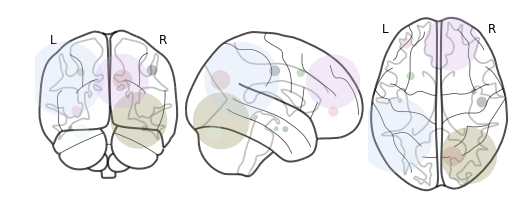

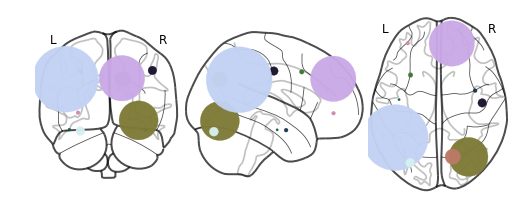

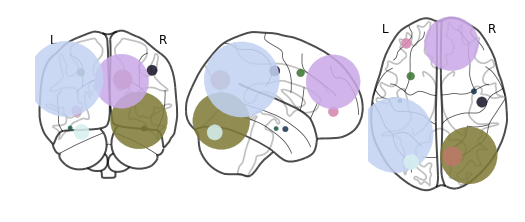

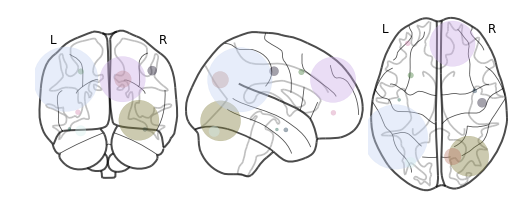

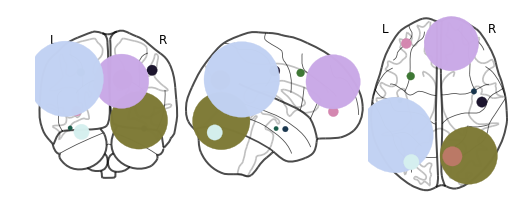

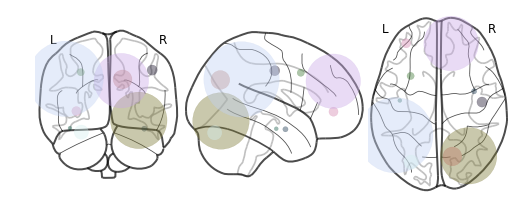

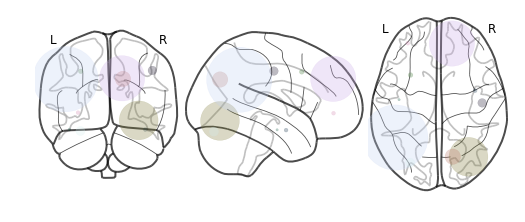

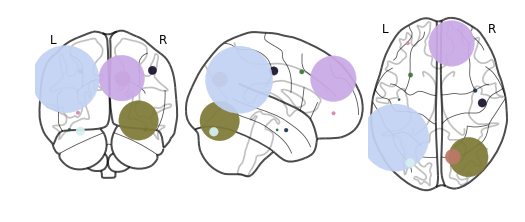

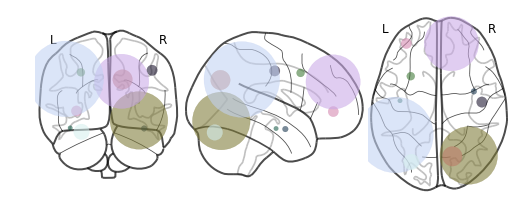

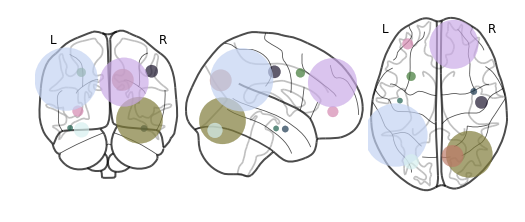

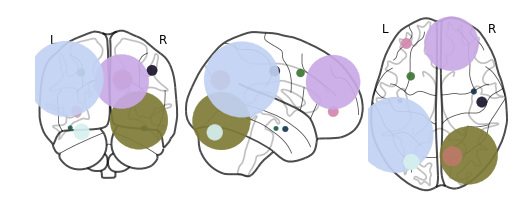

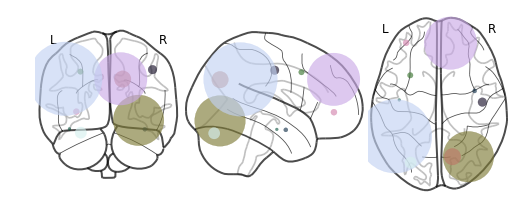

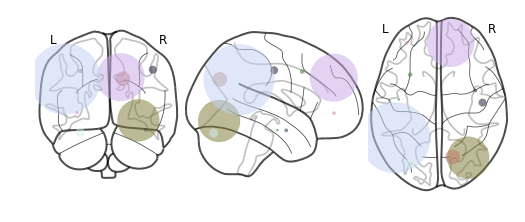

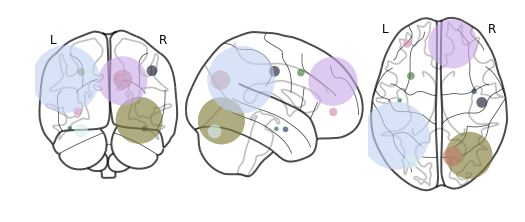

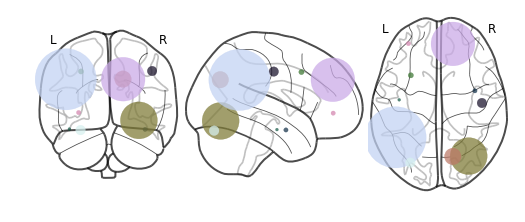

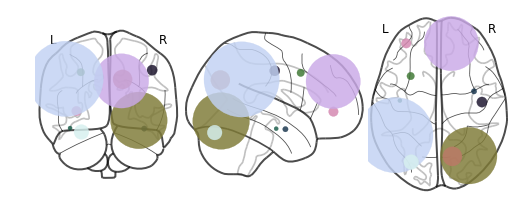

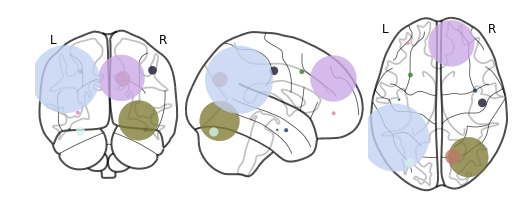

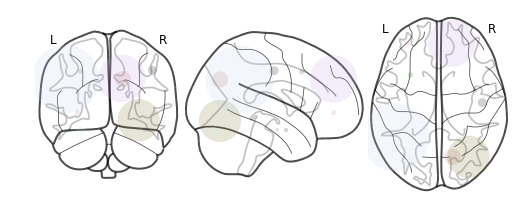

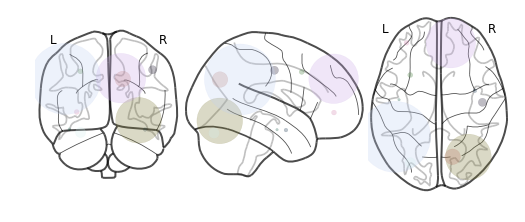

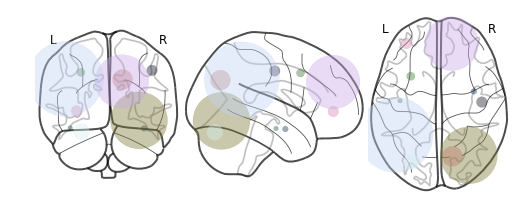

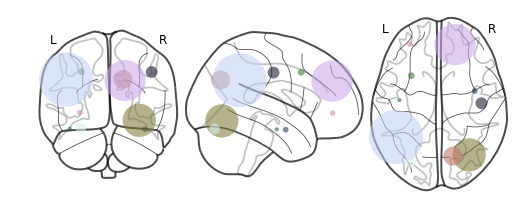

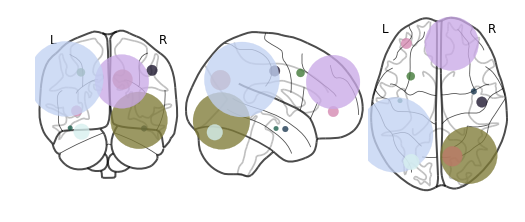

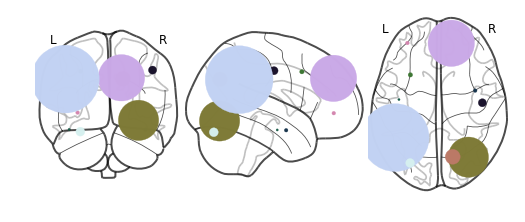

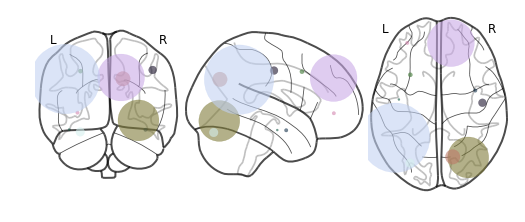

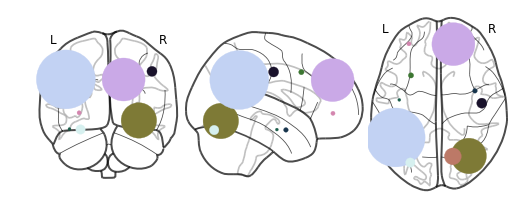

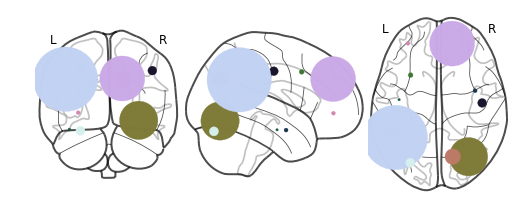

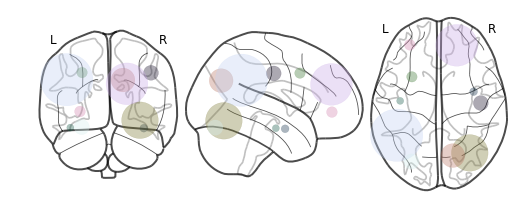

In [9]:
for s in range(dtfa.num_subjects):
    dtfa.plot_factor_centers(s)

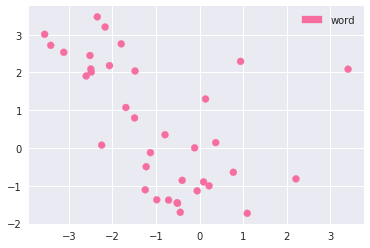

In [10]:
dtfa.scatter_factor_embedding()

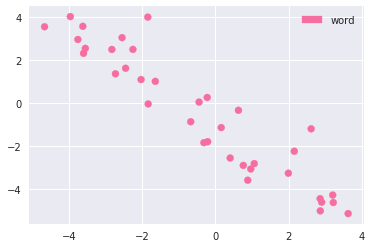

In [17]:
dtfa.scatter_weights_embedding(100)